### Importing Libraries

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn. linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
import warnings 
warnings.filterwarnings( 'ignore' )

### Importing Dataset

In [27]:
df=pd.read_csv("Heart_Disease_Prediction.csv")

### Auditing

In [28]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [30]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [31]:
df.isna() .sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Visualization

<AxesSubplot:xlabel='Age', ylabel='count'>

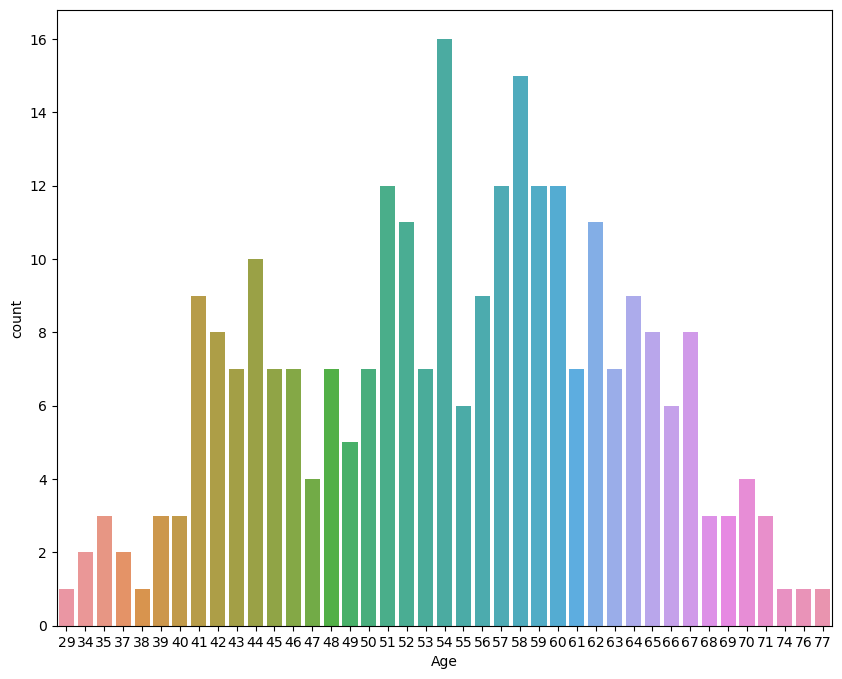

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

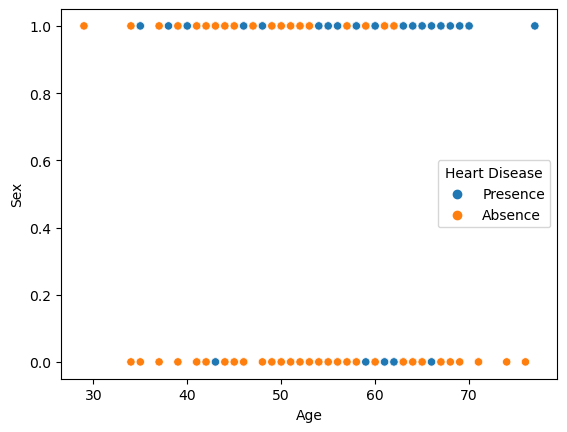

In [33]:
sns.scatterplot(df['Age'],df['Sex'],hue=df['Heart Disease'])

Most of the Male in the age range of 53 and above are affected by Heart Disease

<AxesSubplot:xlabel='Age', ylabel='ST depression'>

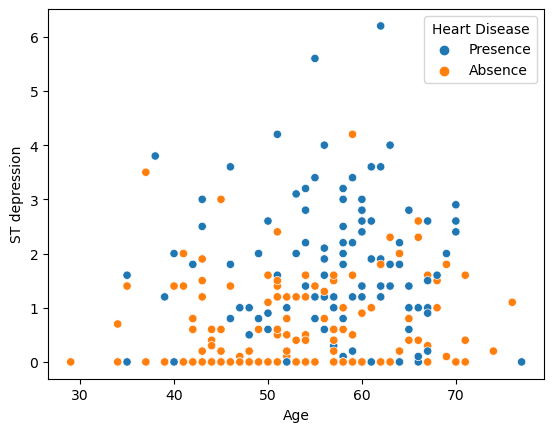

In [34]:
sns.scatterplot(df['Age'],df['ST depression'],hue=df['Heart Disease'])

As the Depression increases the Heart disease affection rate increases and also many people above age 45 only have depression

### Target variable encoding

In [35]:
df['Heart Disease']=df['Heart Disease'].map({ 'Presence' : 1, 'Absence' : 0})

#### Checking whether data is balanced

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

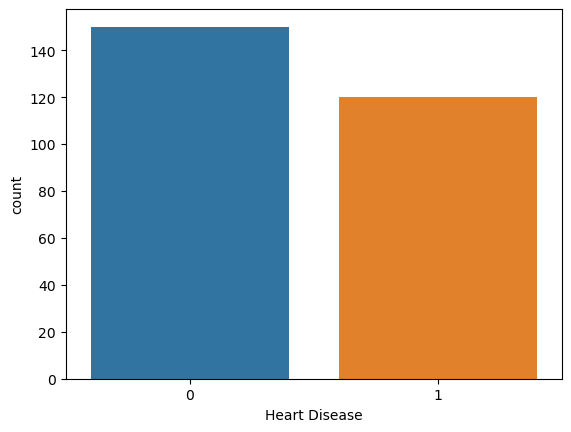

In [36]:
sns.countplot(df[ 'Heart Disease' ] )

<AxesSubplot:>

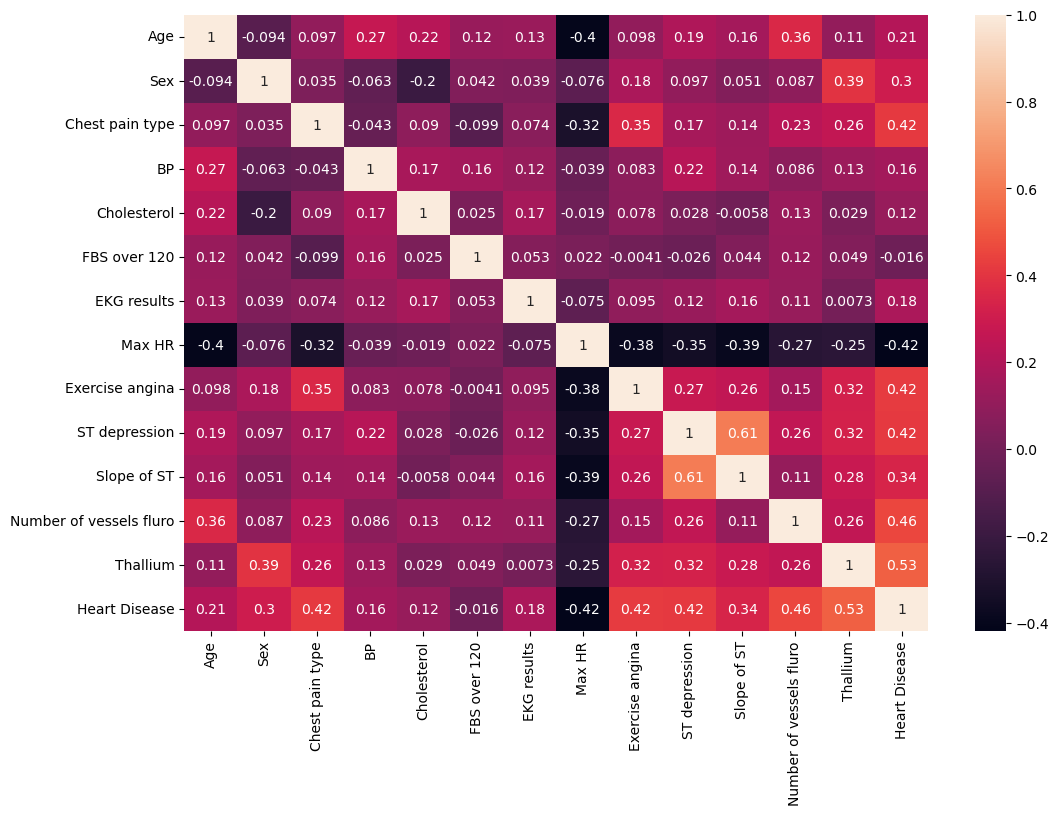

In [37]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df. corr(), annot=True)


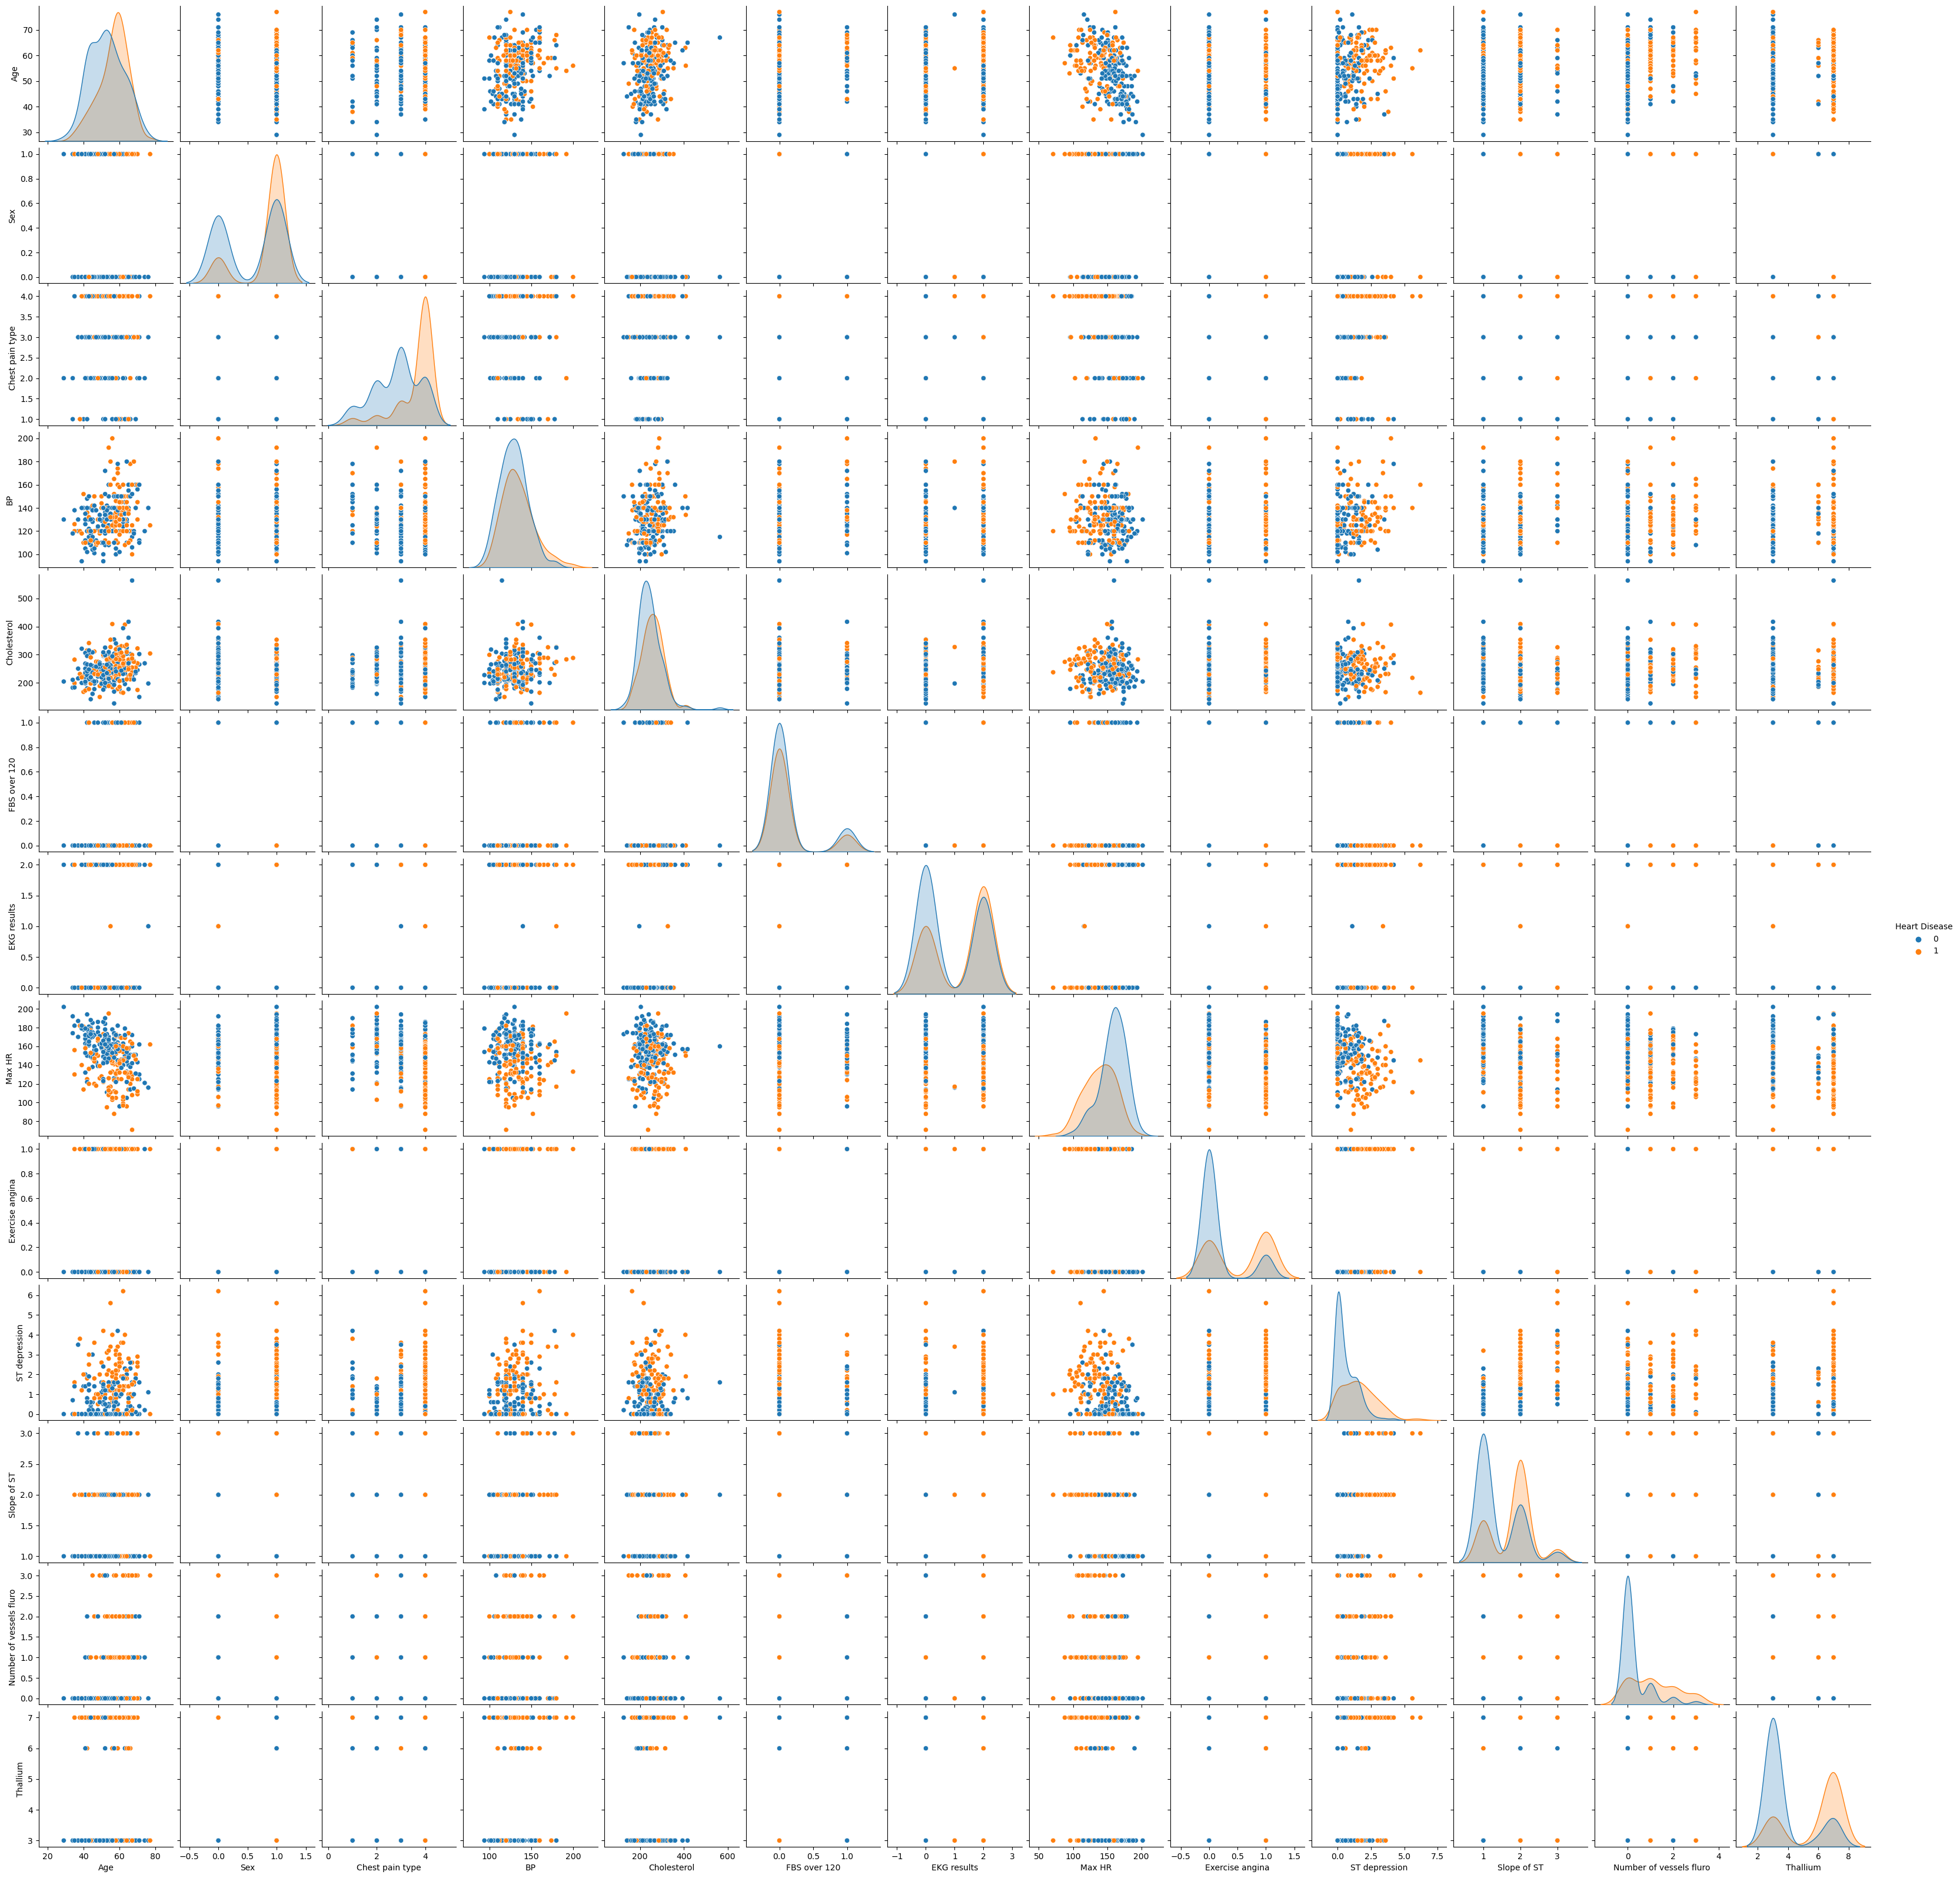

In [38]:
sns.pairplot(df,hue='Heart Disease')

### Train Test Split

In [40]:
x=df.drop(['Heart Disease' ] ,axis=1) 
y=df[ 'Heart Disease' ]

In [90]:
xtrain, xtest, ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

### Pre-defined function for evaluation metrics

In [48]:
def report(actual,pred) :
    acc_score=accuracy_score(actual, pred)
    con_mat=confusion_matrix(actual, pred )
    class_rep=classification_report(actual,pred) 
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print( '\n',con_mat) 
    print( ' \n ' , class_rep)

### Logistic Regression

In [49]:
log=LogisticRegression() 
log.fit(xtrain,ytrain) 
train_log=log.predict (xtrain) 
test_log=log. predict (xtest ) 
report(ytrain,train_log) 
report (ytest, test_log)

Accuracy of model is 87.04 %

 [[110  10]
 [ 18  78]]
 
                precision    recall  f1-score   support

           0       0.86      0.92      0.89       120
           1       0.89      0.81      0.85        96

    accuracy                           0.87       216
   macro avg       0.87      0.86      0.87       216
weighted avg       0.87      0.87      0.87       216

Accuracy of model is 83.33 %

 [[26  4]
 [ 5 19]]
 
                precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.83      0.79      0.81        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



### Decision tree

In [52]:
dt=DecisionTreeClassifier(max_depth=7,min_samples_split=17,min_samples_leaf=10)
dt . fit (xtrain, ytrain) 
pred_dtree_train=dt.predict(xtrain) 
pred_dtree_test=dt . predict (xtest ) 
report(ytrain,pred_dtree_train) 
report (ytest, pred_dtree_test )

Accuracy of model is 86.11 %

 [[114   6]
 [ 24  72]]
 
                precision    recall  f1-score   support

           0       0.83      0.95      0.88       120
           1       0.92      0.75      0.83        96

    accuracy                           0.86       216
   macro avg       0.87      0.85      0.86       216
weighted avg       0.87      0.86      0.86       216

Accuracy of model is 83.33 %

 [[27  3]
 [ 6 18]]
 
                precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.86      0.75      0.80        24

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.83        54
weighted avg       0.84      0.83      0.83        54



### Random Forest

In [110]:
rf=RandomForestClassifier( n_estimators=15 , max_depth=4, min_samples_split=15,random_state=786)
rf.fit(xtrain,ytrain) 
train_rf=rf.predict(xtrain)  
test_rf=rf.predict (xtest) 
report(ytrain,train_rf) 
report (ytest, test_rf)


Accuracy of model is 87.96 %

 [[103  10]
 [ 16  87]]
 
                precision    recall  f1-score   support

           0       0.87      0.91      0.89       113
           1       0.90      0.84      0.87       103

    accuracy                           0.88       216
   macro avg       0.88      0.88      0.88       216
weighted avg       0.88      0.88      0.88       216

Accuracy of model is 85.19 %

 [[31  6]
 [ 2 15]]
 
                precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.71      0.88      0.79        17

    accuracy                           0.85        54
   macro avg       0.83      0.86      0.84        54
weighted avg       0.87      0.85      0.86        54

